Python. Risk versus reward for 5 stocks

In [4]:
import pandas as pd
import yfinance as yf

In [5]:
import numpy as np

In [6]:
import math

In [7]:
from numpy import linalg as LA

In [8]:
from numpy.linalg import inv
from scipy import stats

In [9]:
import matplotlib.pyplot as plt

In [10]:

data = pd.Series()
TickerDax= ['DPW.DE','ALV.DE','BMW.DE','BAS.DE','FME.DE']
for t in TickerDax:
    data_= yf.download(tickers = t,
                        start="2017-01-01",
                        end="2017-12-31",
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )
    display(data_["Adj Close"])
    data[t]=data_["Adj Close"]

/home/german/web/quantitative-portfolio-management/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    25.519751
2017-01-03    25.601025
2017-01-04    25.458797
2017-01-05    25.889545
2017-01-06    25.901737
                ...    
2017-12-21    34.169418
2017-12-22    33.993137
2017-12-27    34.089676
2017-12-28    33.690941
2017-12-29    33.367756
Name: Adj Close, Length: 255, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    124.379189
2017-01-03    126.158302
2017-01-04    126.830399
2017-01-05    127.067619
2017-01-06    127.383919
                 ...    
2017-12-21    162.166214
2017-12-22    161.339890
2017-12-27    160.389618
2017-12-28    159.687241
2017-12-29    158.241165
Name: Adj Close, Length: 255, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    71.088478
2017-01-03    71.760010
2017-01-04    71.246475
2017-01-05    71.372887
2017-01-06    71.507202
                ...    
2017-12-21    72.201233
2017-12-22    71.938210
2017-12-27    71.724503
2017-12-28    71.625862
2017-12-29    71.371056
Name: Adj Close, Length: 255, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    65.737350
2017-01-03    64.996231
2017-01-04    65.329735
2017-01-05    65.062943
2017-01-06    64.862839
                ...    
2017-12-21    71.842049
2017-12-22    71.704018
2017-12-27    71.765358
2017-12-28    71.144257
2017-12-29    70.346771
Name: Adj Close, Length: 255, dtype: float64

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02    73.658379
2017-01-03    72.816055
2017-01-04    72.466576
2017-01-05    72.170868
2017-01-06    72.224625
                ...    
2017-12-21    79.213821
2017-12-22    79.956940
2017-12-27    80.101929
2017-12-28    79.902557
2017-12-29    79.549133
Name: Adj Close, Length: 255, dtype: float64

In [11]:
r=0 # risk free rate

In [12]:
AFactor = len(data["DPW.DE"]) # annualisation factor, based on number of observations equal to 1

In [13]:
n_TickerDax= len(TickerDax)

In [14]:
Vec1 = np.linspace(1,1,n_TickerDax) # create a vector with all components equal to 1

In [15]:
data_R = pd.DataFrame() # daily returns
Mdata_R = pd.DataFrame() # means of the daily returns
Sigma = pd.DataFrame() # Variance covariance matrix of the returns annualised
Sigma_diag = pd.DataFrame() # individual variances (derived from var-covariance matrix)


In [16]:
for x in TickerDax:
    data_R[x]= (data[x]/data[x].shift(1)-1)

In [17]:
Sigma = AFactor*data_R.cov() # annualisation . The missing values are not taken into account with Cov()
invSigma = inv(Sigma)
for x in TickerDax:
    Sigma_diag[x]= [Sigma[x][x]]
    Mdata_R[x] = [float(np.mean(data_R[x]))]

In [18]:
Mean = AFactor*Mdata_R.iloc[0] # avg returns on an annualised basis
STD = Sigma_diag.iloc[0]**.5 # standard deviations on an annualised basis


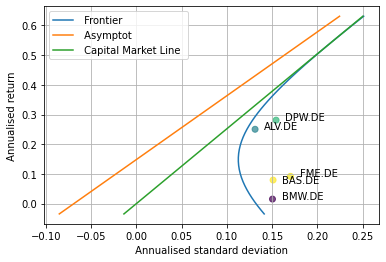

In [19]:
fig,ax = plt.subplots()
# Important variables calculation
a = Vec1.T.dot(invSigma).dot(Vec1)
b = Mean.T.dot(invSigma).dot(Vec1)
sd_a = 1/math.sqrt(a) # standard deviation , minimum variance portfolio
m_a = b/a # expected return , minimum variance p o r t f o l i o
m_w = math.sqrt((Mean - b / a * Vec1 ).T.dot(invSigma).dot(Mean-b/a*Vec1)) # expected return , portfolio w
m_r = math.sqrt((Mean - r * Vec1 ).T.dot(invSigma).dot(Mean-r*Vec1)) # expected return , Tangent Portfolio

# Graph plotting
np.random.seed (7777) # Fixing random s t a t e for r e p r o du c i b ility
colors = np.random.rand(len(STD)) # each p o i n t w i l l have i t s own ( random ) color
plt.scatter(STD,Mean, c= colors,alpha = 0.7) # plot the assets ,alpha transparency parameter
ax.annotate(TickerDax[0],(STD[0]+.01,Mean[0]))

ax.annotate(TickerDax[1],(STD[1]+.01,Mean[1]))
ax.annotate(TickerDax[2],(STD[2]+.01,Mean[2]))
ax.annotate(TickerDax[3],(STD[3]+.01,Mean[3]-0.01))
ax.annotate(TickerDax[4],(STD[4]+.01,Mean[4]))
range_inf = np . min ( Mean ) - 0.05
range_sup = np . max ( Mean ) + 0.35
z2 = np.linspace(range_inf , range_sup , 50) # range of expected returns considered
z1 = pd.DataFrame ()
z= pd.DataFrame ()
zr= pd.DataFrame ()
i =0
for i in range ( len ( z2 ) ) :
    z1[i]= [math.sqrt(((z2[i]-m_a)/m_w)**2+sd_a**2 )] # Frontier
    z[i]= [(z2[i]-b/a) /m_w] # Asymptot to the Frontier
    zr[i]= [(z2[i]-r)/m_r] # Capital Marlet Line
z1 = z1.iloc[0]
z=z.iloc[0]
zr=zr.iloc[0]
plt.plot(z1,z2,alpha=1) # plot the Frontier
plt.plot(z,z2,alpha=1) # plot the asymptot to the Frontier
plt.plot(zr,z2,alpha=1) # plot the Capital Market Line
plt.legend ([ ' Frontier ' , ' Asymptot ' , ' Capital Market Line ' ] , loc =2)
plt.grid ( True )
plt.xlabel( ' Annualised standard deviation ' )
plt.ylabel( ' Annualised return ' )
plt.show()

In [20]:

# Useful Ouputs .
print(" annualised standard deviations of the returns : ")
print(STD)
print(" annualised means of the returns : ")
print(Mean)
print("min variance portfolio:")
print("sd_a" , sd_a , " ,m_a " , b/a)
print("matrix of variance - covariance : ")
print(Sigma)
print(" Correl Matrix")
print(data_R.corr())

 annualised standard deviations of the returns : 
DPW.DE    0.154353
ALV.DE    0.131155
BMW.DE    0.150390
BAS.DE    0.151034
FME.DE    0.170277
Name: 0, dtype: float64
 annualised means of the returns : 
DPW.DE    0.281142
ALV.DE    0.250371
BMW.DE    0.015238
BAS.DE    0.079365
FME.DE    0.091780
Name: 0, dtype: float64
min variance portfolio:
sd_a 0.11260861533457656  ,m_a  0.14847690140797348
matrix of variance - covariance : 
          DPW.DE    ALV.DE    BMW.DE    BAS.DE    FME.DE
DPW.DE  0.023825  0.012324  0.010318  0.012646  0.010968
ALV.DE  0.012324  0.017202  0.009887  0.011984  0.008223
BMW.DE  0.010318  0.009887  0.022617  0.011725  0.007501
BAS.DE  0.012646  0.011984  0.011725  0.022811  0.010268
FME.DE  0.010968  0.008223  0.007501  0.010268  0.028994
 Correl Matrix
          DPW.DE    ALV.DE    BMW.DE    BAS.DE    FME.DE
DPW.DE  1.000000  0.608764  0.444511  0.542464  0.417327
ALV.DE  0.608764  1.000000  0.501275  0.605000  0.368211
BMW.DE  0.444511  0.501275  1.000000 

# Code for 30 Stocks

In [21]:
data=pd.Series()
TickerDax=['DPW.DE','ALV.DE','BMW.DE','DTE.DE','FME.DE','BAS.DE',
'HEN3.DE','LIN.F','SAP.DE','DBK.DE','BAYN.DE','VOW3.DE',
'HEI.DE','FRE.F','MRK.DE','BEI.DE','SIE.DE','MUV2.DE',
'DB1.DE','VNA.DE','EOAN.F','DAI.DE','ADS.DE','WDI.F',
'RWE.DE','IFX.DE','1COV.DE','TKA.DE','CON.DE','LHA.DE']

/home/german/web/quantitative-portfolio-management/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [23]:
def download_ticker(ticker):
    data_= yf.download(tickers = t,
                        start="2017-01-01",
                        end="2017-12-31",
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )
    return data_["Adj Close"]
for t in TickerDax:
    data[t]=download_ticker(t)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [24]:
DAX = download_ticker("^GDAXI")

[*********************100%***********************]  1 of 1 completed


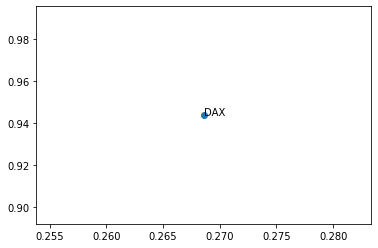

In [30]:
Dax_R=(DAX/DAX.shift(1)-1)
DaxFactor=len(Dax_R)
Dax_mean=np.mean(Dax_R)*DaxFactor
Dax_std=np.std(Dax_R)*np.sqrt(DaxFactor)
plt.scatter(Dax_std,Dax_mean)
plt.annotate("DAX",(Dax_std,Dax_mean))
plt.show()

In [32]:
#Dataextraction,calculationoftheparametersMeanandSigma
#Libraryimportations
import pandas as pd
import numpy as np
#Dataextraction

Tickers=['DPW.DE','ALV.DE','BMW.DE','DTE.DE','FME.DE','BAS.DE',
'HEN3.DE','LIN.F','SAP.DE','DBK.DE','BAYN.DE','VOW3.DE',
'HEI.DE','FRE.F','MRK.DE','BEI.DE','SIE.DE','MUV2.DE',
'DB1.DE','VNA.DE','EOAN.F','DAI.DE','ADS.DE','WDI.F',
'RWE.DE','IFX.DE','1COV.DE','TKA.DE','CON.DE','LHA.DE']
#'FRE.F'changedto'FRE.DE'after2019/06/03
#'WDI.F'changedto'WDI.DE'after2019/06/03
#'EOAN.F'changedto'EOAN.DE'after2019/06/03

In [33]:

startinput='2017-01-01'
endinput='2017-12-31'
S=pd.DataFrame()#createthedataframethatwillcontainthedata
for t in Tickers:
    S[t]=download_ticker(t)
#Calculation of the mean vector and variance-covariance matrix
R=pd.DataFrame()
Mean=pd.DataFrame()
Covar=pd.DataFrame()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [34]:
R=S/S.shift(1)-1 # calculate the returns
R=R[1:] # eliminate the first row which is undefined
Mean=R.mean() # calculate the mean vector
Covar=R.cov() # calculate the variance-covariance matrix
#Annualisation of the mean vector and variance-covariance matrix
Mean_A=pd.DataFrame()
Covar_A=pd.DataFrame()
n=len(R)#calculatethenumberofreturnsobserved
d=len(Tickers)#calculatethenumberofstocksused
#Calculationoftheaveragefractionoftime(expressedinyears)betweentwoobservations
Ys=int(startinput[0:4])
Ms=int(startinput[5:7])
Ds=int(startinput[8:10])
Ye=int(endinput[0:4])
Me=int(endinput[5:7])
De=int(endinput[8:10])

In [35]:


import datetime
startdate=datetime.date(Ys,Ms,Ds)
enddate=datetime.date(Ye,Me,De)
z=enddate-startdate
Duration=float(z.days)#calculatethenumberofcalendardays between the two dates
m=float(len(R)-1)
delta=Duration/365/m #calculatethetimeinterval,delta
Covar_A=Covar/delta #calculatethemeanvectoronanannual basis

In [36]:

Mean_A=Mean/delta#calculatethevariance-covariancematrix on anannual basis 5.5 Stability of the Solutions

#Optimal investment portfolio ofrisky assets with positive allocations and limit constraints
#Ref1:https://pypi.org/project/qpsolvers/
#Ref2:https://scaron.info/blog/quadratic-programming-in-python.html
#Ref3:https://web.stanford.edu/~boyd/papers/pdf/cvxpy_paper.pdf

In [38]:

!pip install qpsolvers #toaddwhenrunningonGoogleColab

     |████████████████████████████████| 269 kB 90 kB/s eta 0:00:011
  Using cached Cython-0.29.23-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
  Created wheel for quadprog: filename=quadprog-0.1.8-cp37-cp37m-linux_x86_64.whl size=336646 sha256=2cab47eb8ba0aacac6516141ce6c0558e06f8cb19ed84446f10742000f3f922b
  Stored in directory: /home/german/.cache/pip/wheels/40/74/3a/072734cebfae52efc8a2523fd4703da7dfac29f17bd01ee372
Successfully built quadprog
You should consider upgrading via the '/home/german/web/quantitative-portfolio-management/env/bin/python -m pip install --upgrade pip' command.


In [39]:

from numpy import array,dot
from qpsolvers import solve_qp

In [40]:
m=0.1 # expected return chosen here

In [47]:
array(2*Covar_A)

array([[ 0.04740585,  0.02452174,  0.02053135,  0.01674508,  0.02182473,
         0.02516303,  0.01902849,  0.00362133,  0.01890161,  0.03551316,
         0.02673297,  0.02002293,  0.02285674,  0.0189759 ,  0.01944621,
         0.01803951,  0.02929497,  0.02157854,  0.01618769,  0.00726787,
         0.01966187,  0.01921805,  0.01651137,  0.01897438,  0.0198427 ,
         0.02625871,  0.02319812,  0.02498734,  0.02423461,  0.03225143],
       [ 0.02452174,  0.03422726,  0.01967349,  0.01379377,  0.01636211,
         0.02384613,  0.0187722 ,  0.00539784,  0.01816551,  0.04248171,
         0.02130716,  0.01709504,  0.02242287,  0.01784646,  0.01088384,
         0.01487825,  0.02413269,  0.02606585,  0.01360509,  0.005728  ,
         0.01614784,  0.01819634,  0.02052605,  0.01501568,  0.01799256,
         0.01934563,  0.01855019,  0.02004315,  0.0202819 ,  0.02331889],
       [ 0.02053135,  0.01967349,  0.0450026 ,  0.01354417,  0.01492588,
         0.02333076,  0.0121661 ,  0.01184425,  0

In [53]:
P=array(2*Covar_A)
q=np.zeros(d)
G1=np.diag([-1]*d)
G2=np.diag([1]*d)
G=np.vstack([G1,G2])#createthematrixwithblocks-IdandId.
h=array([0]*d+[0.1]*d)
A=array([Mean_A,[1]*d])
b=array([m,1])

alloc=solve_qp(P,q,G,h,A,b)#findthesolution
Vec1=[1]*d
print("QPsolution:",alloc)
print("checkalloc:",dot(alloc.T,Vec1))
print("checkmean:",dot(alloc.T,Mean_A))
print("standarddeviation:",np.sqrt(dot(alloc.T,dot(P,alloc)))
/2)#standarddeviation

QPsolution: [-1.19628566e-17 -6.43117002e-18  5.96664088e-02  1.00000000e-01
 -2.22698727e-18  2.53056891e-17  8.61329362e-02  1.00000000e-01
  9.29588338e-03  3.56120587e-18  2.72632899e-18 -7.51570477e-18
  1.16750423e-02  3.00793380e-02  1.00000000e-01  4.35261718e-02
  3.11320629e-17  1.00000000e-01  7.57628555e-02  1.00000000e-01
  1.57807716e-02  1.00000000e-01  2.90751213e-02  1.10536834e-18
 -5.89301908e-19  6.36676519e-18  3.90054712e-02  2.69373253e-19
 -1.24141458e-18 -1.93163210e-18]
checkalloc: 1.0000000000000004
checkmean: 0.10000000000000002
standarddeviation: 0.05923276737391324
